In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn import metrics

import string
import re
from nltk.tokenize import WordPunctTokenizer

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/My Drive/Datasets/New_Delhi_reviews.csv')
df.head()

,rating_review,review_full
0,5,"Totally in love with the Auro of the place, re..."
1,5,I went this bar 8 days regularly with my husba...
2,5,We were few friends and was a birthday celebra...
3,5,Fatjar Cafe and Market is the perfect place fo...
4,5,"Hey Guys, if you are craving for pizza and sea..."


In [4]:
df.shape

(147581, 2)

In [5]:
df.isnull().sum()

rating_review    0
review_full      2
dtype: int64

In [6]:
df[df.isnull().any(axis=1)]

,rating_review,review_full
79882,3,NaN
141165,5,NaN


In [7]:
df = df.dropna()

In [8]:
df.shape

(147579, 2)

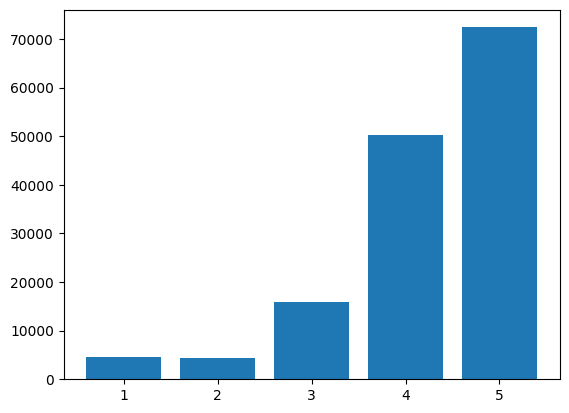

In [9]:
plt.bar(df['rating_review'].unique(), df['rating_review'].value_counts())
plt.show()

# Text Preprocessing

In [10]:
def find_pattern(text, pattern):
    pattern = re.compile(pattern)
    found = pattern.findall(text)
    if found != []:
        return True
    return False

def count_patterns(series, pattern) -> int:
    return series.apply(lambda text: find_pattern(text, pattern)).sum()

In [11]:
def remove_pattern(text, pattern):
    pattern = re.compile(pattern)
    return pattern.sub('', text)

## Lower casing

In [12]:
def lower_casing(text):
    return text.lower()

In [13]:
df['lower'] = df['review_full'].apply(lambda text: lower_casing(text))
df.head()

,rating_review,review_full,lower
0,5,"Totally in love with the Auro of the place, re...","totally in love with the auro of the place, re..."
1,5,I went this bar 8 days regularly with my husba...,i went this bar 8 days regularly with my husba...
2,5,We were few friends and was a birthday celebra...,we were few friends and was a birthday celebra...
3,5,Fatjar Cafe and Market is the perfect place fo...,fatjar cafe and market is the perfect place fo...
4,5,"Hey Guys, if you are craving for pizza and sea...","hey guys, if you are craving for pizza and sea..."


## Removal of URLs

In [14]:
URL_PATTERN = r'https?://\S+|www\.\S+'
print("Amount of URLs: {}".format(count_patterns(df['lower'], URL_PATTERN)))

Amount of URLs: 84


In [15]:
df['text_wo_urls'] = df['lower'].apply(lambda text: remove_pattern(text, URL_PATTERN))
df.head()

,rating_review,review_full,lower,text_wo_urls
0,5,"Totally in love with the Auro of the place, re...","totally in love with the auro of the place, re...","totally in love with the auro of the place, re..."
1,5,I went this bar 8 days regularly with my husba...,i went this bar 8 days regularly with my husba...,i went this bar 8 days regularly with my husba...
2,5,We were few friends and was a birthday celebra...,we were few friends and was a birthday celebra...,we were few friends and was a birthday celebra...
3,5,Fatjar Cafe and Market is the perfect place fo...,fatjar cafe and market is the perfect place fo...,fatjar cafe and market is the perfect place fo...
4,5,"Hey Guys, if you are craving for pizza and sea...","hey guys, if you are craving for pizza and sea...","hey guys, if you are craving for pizza and sea..."


## Removal @tags

In [16]:
TAGS_PATTERN = r'@[\w]*'
print("Amount of @tags: {}".format(count_patterns(df['text_wo_urls'], TAGS_PATTERN)))

Amount of @tags: 903


In [17]:
df['text_tagless'] = df['text_wo_urls'].apply(lambda text: remove_pattern(text, TAGS_PATTERN))
df.head()

,rating_review,review_full,lower,text_wo_urls,text_tagless
0,5,"Totally in love with the Auro of the place, re...","totally in love with the auro of the place, re...","totally in love with the auro of the place, re...","totally in love with the auro of the place, re..."
1,5,I went this bar 8 days regularly with my husba...,i went this bar 8 days regularly with my husba...,i went this bar 8 days regularly with my husba...,i went this bar 8 days regularly with my husba...
2,5,We were few friends and was a birthday celebra...,we were few friends and was a birthday celebra...,we were few friends and was a birthday celebra...,we were few friends and was a birthday celebra...
3,5,Fatjar Cafe and Market is the perfect place fo...,fatjar cafe and market is the perfect place fo...,fatjar cafe and market is the perfect place fo...,fatjar cafe and market is the perfect place fo...
4,5,"Hey Guys, if you are craving for pizza and sea...","hey guys, if you are craving for pizza and sea...","hey guys, if you are craving for pizza and sea...","hey guys, if you are craving for pizza and sea..."


## Removal of Punctuations

In [18]:
PUNCT_PATTERN = "[^a-zA-Z ]"
print("Amount of Punctuations: {}".format(count_patterns(df['text_tagless'], PUNCT_PATTERN)))

Amount of Punctuations: 145256


In [19]:
df['review_clear'] = df['text_tagless'].apply(lambda text: remove_pattern(text, PUNCT_PATTERN))
df[['review_full', 'review_clear']].head()

,review_full,review_clear
0,"Totally in love with the Auro of the place, re...",totally in love with the auro of the place rea...
1,I went this bar 8 days regularly with my husba...,i went this bar days regularly with my husban...
2,We were few friends and was a birthday celebra...,we were few friends and was a birthday celebra...
3,Fatjar Cafe and Market is the perfect place fo...,fatjar cafe and market is the perfect place fo...
4,"Hey Guys, if you are craving for pizza and sea...",hey guys if you are craving for pizza and sear...


## Tockenization

In [ ]:
tokenizer = WordPunctTokenizer()

# Models

- [Word2Vec](http://localhost:8888/notebooks/main.ipynb#Word2Vec) + Classification
    - Random Forest
    - Naive Bayes
    - KNN
    - XGBoost
- LSTM
- Bi-Directional LSTM
- Encoder-Decoder Models (Seq2Seq Models)
- Attention Models
- Transformers - Attention is all you need
- BERT

## Word2Vec
[link](https://github.com/BigWheel92/sentiment-analysis-using-word2vec/blob/main/code.ipynb)